### Import required libraries

In [1]:
# Libraries to process file and visualization for EDA
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection 
from scipy.stats import zscore

# %matplotlib inline
sns.set(style='white', context='notebook')

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Get current working directory
# print(os.getcwd())
# Change current working directory pointing to dataset
# os.chdir(r"../data/project/regression")

### Import Dataset

In [2]:
# Import dataset file and get panda dataframe. Also copy original dataframe to future reference.
dataset = pd.read_csv(r"del_dataset.csv")
dataset_original = dataset

In [3]:
# Check few columns and related data values 
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [4]:
# Check all available columns
dataset.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken'],
      dtype='object')

In [5]:
# Check all column datatypes also observe Non-Null values
dataset.info()

# Observation : There are total 5000 records available. 
    # Other than 'Address' column all columns are numerical having datatype float64
    # and We can see there are some missing values Avg. Area Income, Avg. Area Number of Rooms and 
# Avg. Area Number of Bedrooms columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather_conditions           45593 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [48]:
# Drop unnecessary feature(s)
# dataset = dataset.iloc[:, 0:6]
dataset = dataset.drop(columns=['Address'], axis=1) 

### Checking missing values

In [6]:
# Get total missing values and it's percentages
total_missing = dataset.isnull().sum()
percentage_missing = total_missing * 100 / len(dataset)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

# Observation : Here we do have missing values in dataset but no colum have missing values 25% or greater so no need to 
# drop any column but we will do imputation.

# In imputation if variable is char then we will use mode function and if it is numeric then we will first check for
# outrliers if there are outrliers then we will impute by median else we will impute using mean

,Total,%
ID,0.0,0.000000
Delivery_person_ID,0.0,0.000000
Delivery_person_Age,0.0,0.000000
Delivery_person_Ratings,1908.0,4.184853
Restaurant_latitude,0.0,0.000000
Restaurant_longitude,0.0,0.000000
Delivery_location_latitude,0.0,0.000000
Delivery_location_longitude,0.0,0.000000
Order_Date,0.0,0.000000
Time_Orderd,1731.0,3.796635


In [7]:
# MEDIAN difference is more than 10% then there are possible outliers present in data.
dataset.describe().T

# Observation : As there is not much MEAN and MEDIAN difference for each column so there are less or no outliers

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44600.0,0.744664,0.572473,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken,45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


### Univirate Analysis

In [ ]:
### Draw Scatter plot for numerical columns And analyse the distribution 
for column in dataset.columns :
    plt.figure()
    sns.scatterplot(data=dataset, x=column, y=dataset.index)

<Figure size 640x480 with 0 Axes>

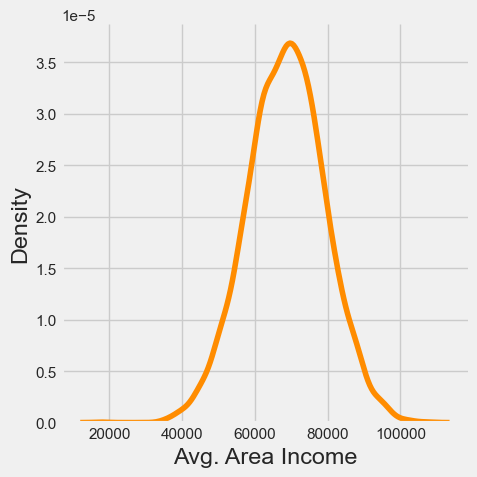

<Figure size 640x480 with 0 Axes>

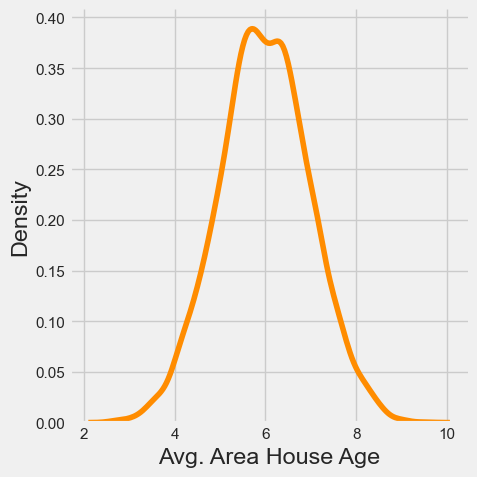

<Figure size 640x480 with 0 Axes>

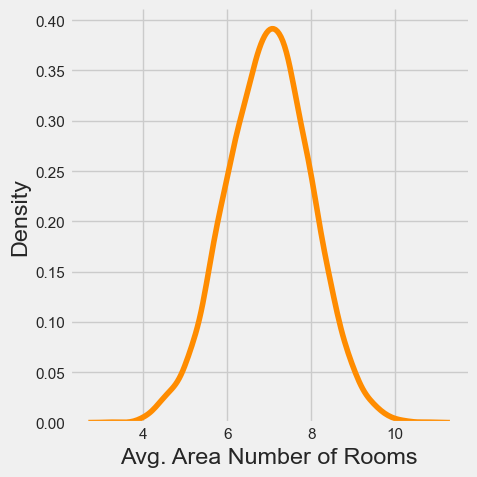

<Figure size 640x480 with 0 Axes>

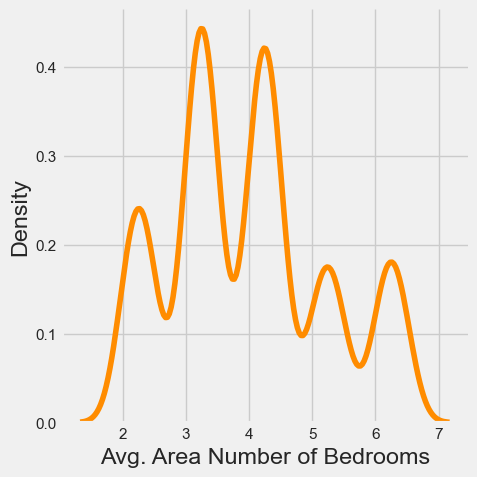

<Figure size 640x480 with 0 Axes>

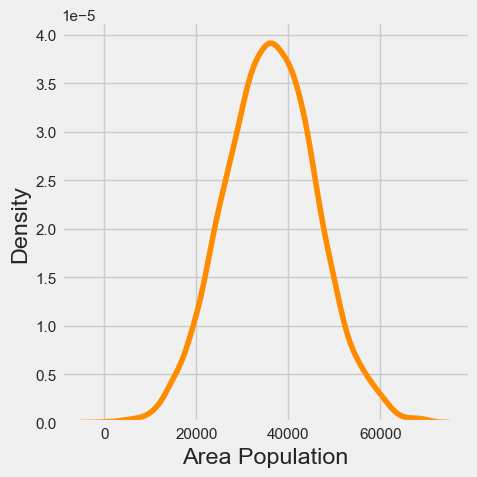

<Figure size 640x480 with 0 Axes>

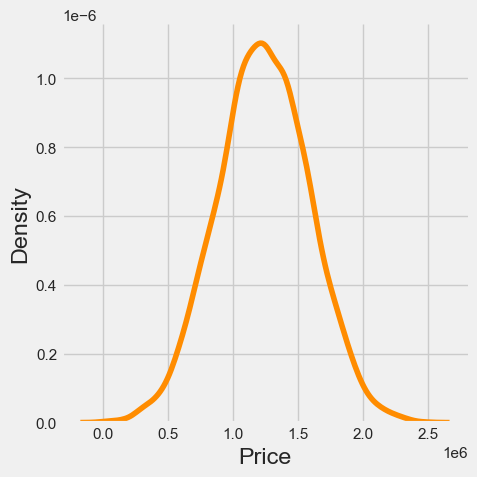

In [52]:
### Draw hist plot for numerical columns And analyse the distribution 
for column in dataset.columns :
    plt.figure()
    sns.displot(dataset[column],color='darkorange',kind='kde')
#     sns.displot(dataset[column], color='darkorange', kind='hist')
    
# Observation : Here we can see other than column 'Avg. Area Number of Bedrooms' 
# all columns seems to be Normally/Gaussian/Symetrically distributed.

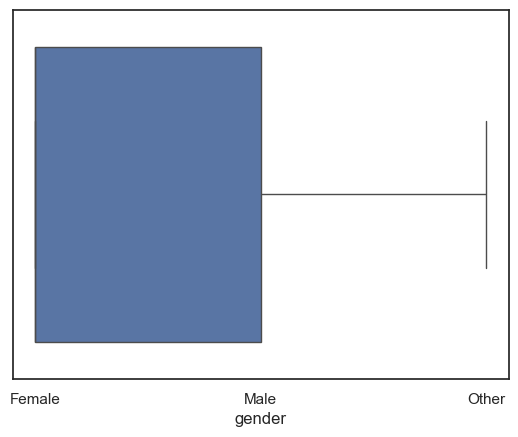

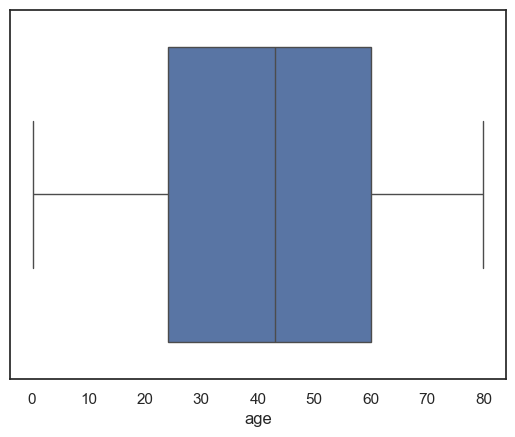

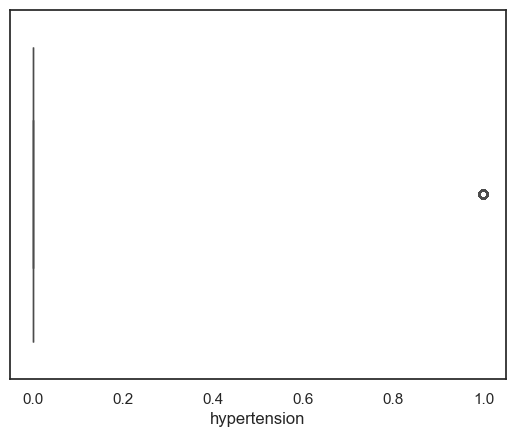

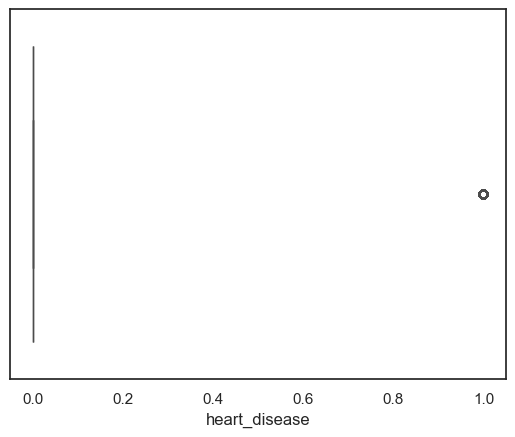

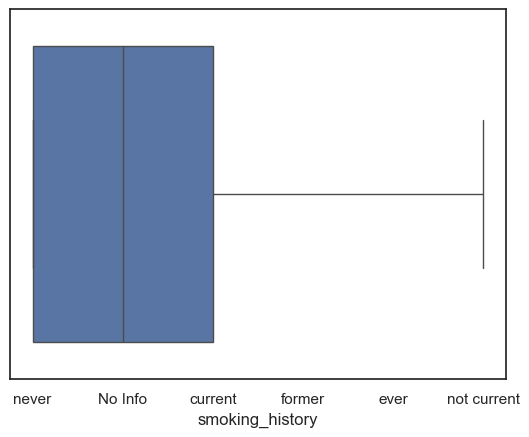

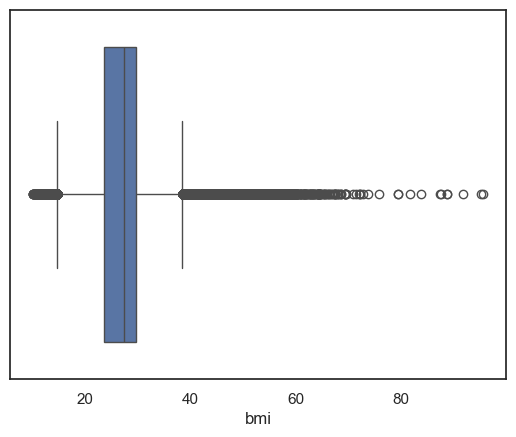

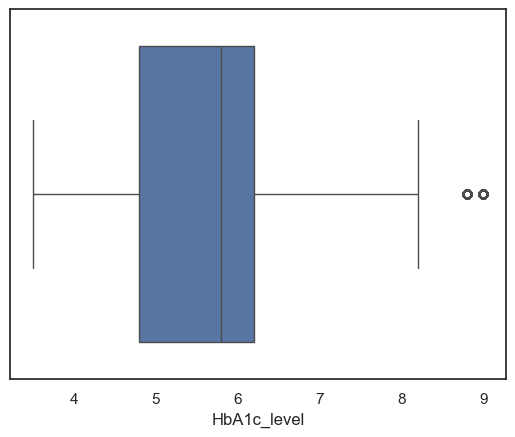

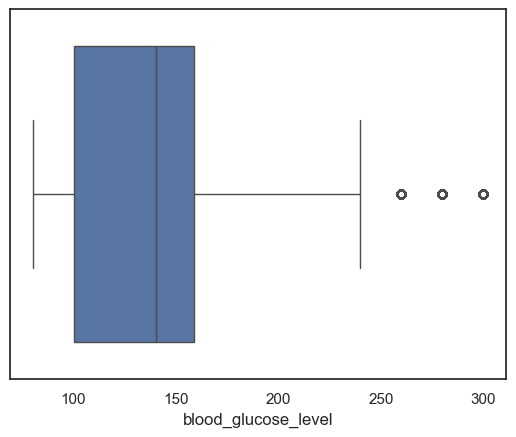

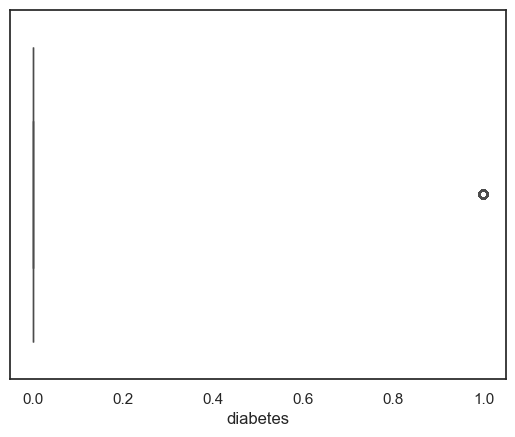

In [9]:
### Draw box plot 
# Identify Outliers  for numerical columns. It represents the five-point summary. 
for column in dataset.columns :
    plt.figure()
    sns.boxplot(x = dataset[column], data = dataset)
    
# Observation : There are outliers in columns 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
#  'Avg. Area Number of Bedrooms', 'Area Population' and 'Price'

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kody\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['gender'] = encoder.fit_transform(dataset['gender'])

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 6.5+ MB


In [18]:
# Outlier Removal : Z-Score method
# We will use z-score method to remove outliers as in univirate analysis we have seen our data is uniformally distributed
print('Before outlier removal : ',dataset.shape)
# cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']
z = np.abs(zscore(dataset, axis = 1))
threshold = 3
# print(np.where(z>threshold))
dataset = dataset[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

# # As we have Avg. Area Number of Bedrooms column is not normally distributed then let's use IQR method for outlier removal
# cols = ['bmi']
# Q1 = dataset.quantile(0.25)  # Q1
# Q3 = dataset.quantile(0.75)  # Q3
# IQR = Q3-Q1
# dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
# print('After IQR approach : ',dataset.shape)

Before outlier removal :  (100000, 9)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

### Bi-virate analysis

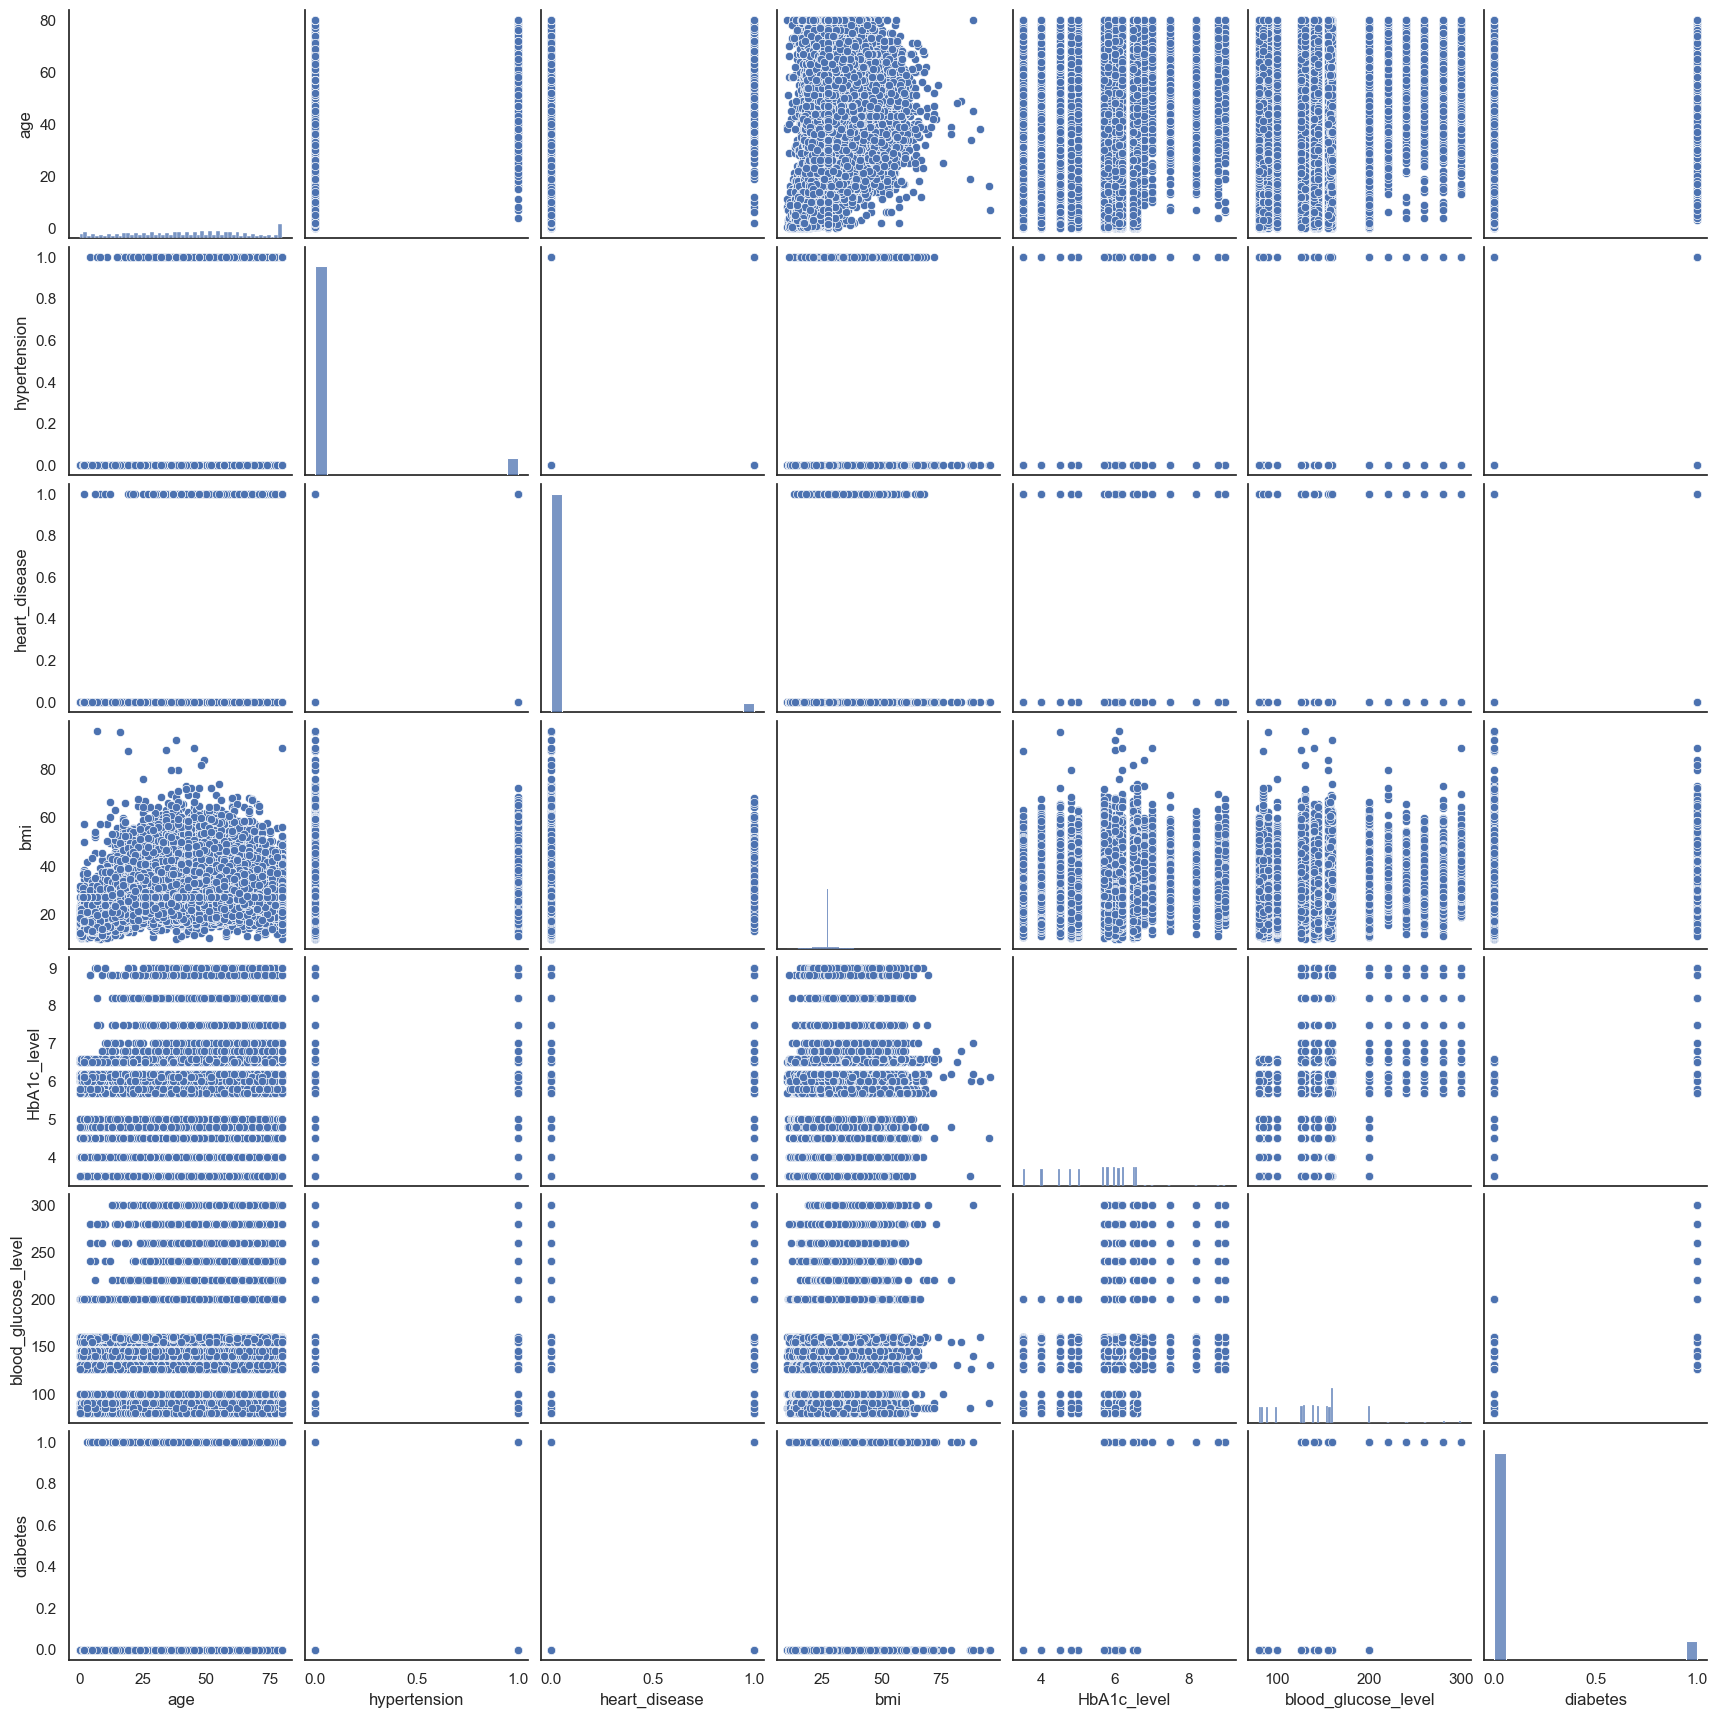

In [10]:
# Visualize relation with each independend and dependent variable
sns.pairplot(data=dataset)

In [1]:
# Calculate co-relation
corr = dataset.corr()
corr

NameError: name 'dataset' is not defined

In [ ]:
import pandas as pd
import numpy as np

# Example data (like your dataset)
data = {
    'Discount Applied': ['$26', '$20', '10%', '19%', '$21'],
    'Total Sale Amount': ['$1455.20', '$3663.75', '$702.12', '$1605.11', '$9.77']
}

df = pd.DataFrame(data)

def convert_discount(row):
    discount = str(row['Discount Applied']).strip()
    total_sales_str = str(row['Total Sale Amount']).strip()
    try:
        total_sales = float(total_sales_str.replace('$', '').replace(',', '').strip())
    except:
        return np.nan

    if discount in ['', 'nan', 'None'] or pd.isna(discount):
        return np.nan

    if '$' in discount:
        try:
            discount_value = float(discount.replace('$', '').replace(',', '').strip())
            if discount_value > total_sales:
                return np.nan
            percent = (discount_value / total_sales) * 100
            return round(percent, 2)
        except:
            return np.nan


    if '%' in discount:
        try:
           
            percent_value = float(discount.replace('%', '').replace(' ', '').strip())
            return round(percent_value, 2)
        except:
            return np.nan

    return 0.0

df['Discount Percent'] = df.apply(convert_discount, axis=1)
print(df)


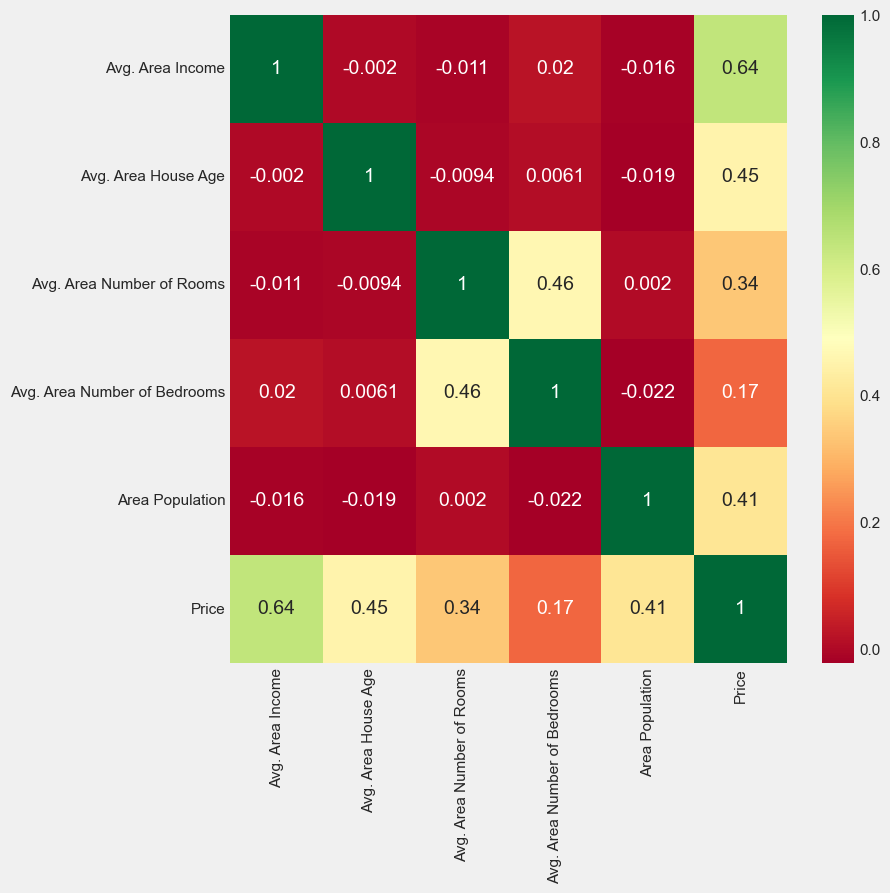

In [56]:
# plot co-relation in heat map to check multi-co-linearility between features
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

### Pre-processing

In [11]:
# Check Skewness and Kurtosisto check if data require scaling/transformation or not.

skew = dataset.skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = dataset.kurt()
print(kurt)

# Observation : Skew and Kurt values are in range -3 to 3 then no need to have a transformation.

TypeError: could not convert string to float: 'Female'

StandardScaler (Z-score normalization)
Use when:
Features are roughly normally distributed
No significant outliers

MinMaxScaler (Normalization)
Use when:
You need a bounded range (e.g., neural networks, image data scaled to [0,1])
No outliers

RobustScaler
Use when:
Data contains many outliers
You want robust central tendency (uses median and IQR)

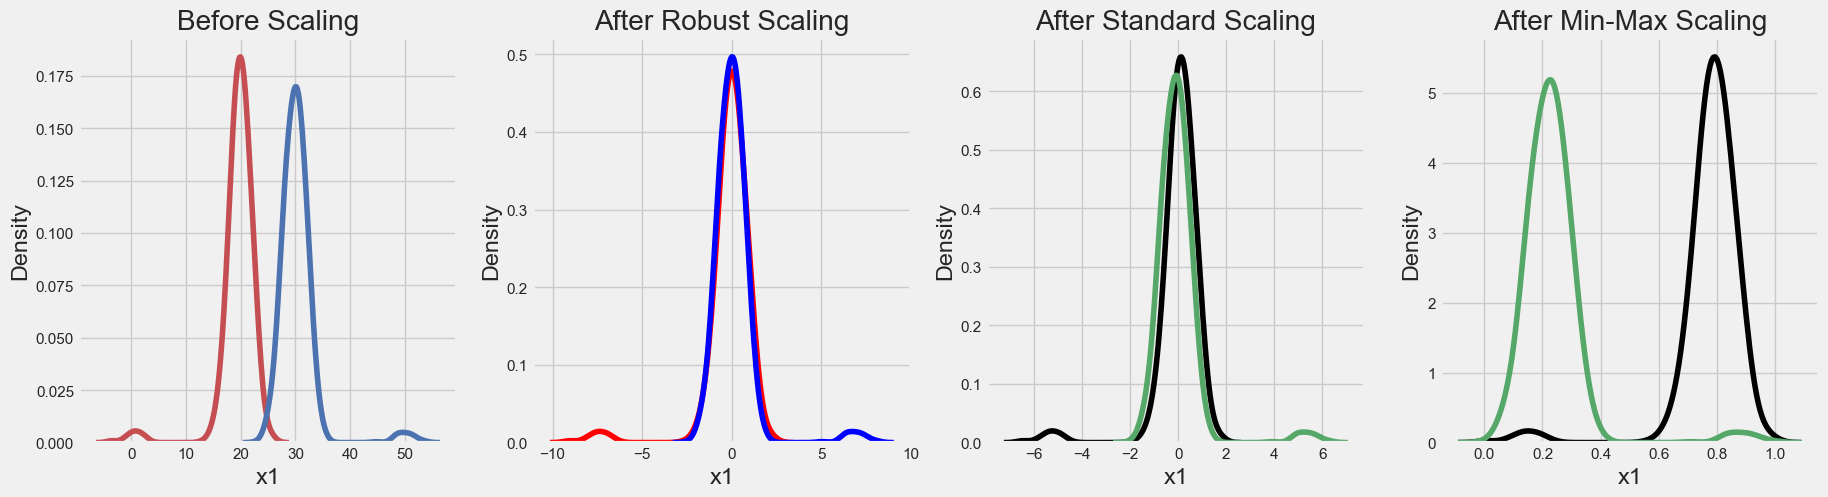

In [58]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
# % matplotlib inline
import matplotlib.pyplot as plt
plt.show()

matplotlib.style.use('fivethirtyeight')
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal


scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])


scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])


scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [59]:
# Outlier Removal : Z-Score method
# We will use z-score method to remove outliers as in univirate analysis we have seen our data is uniformally distributed
print('Before outlier removal : ',dataset.shape)
# cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']
z = np.abs(zscore(dataset, axis = 1))
threshold = 3
# print(np.where(z>threshold))
dataset = dataset[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

# As we have Avg. Area Number of Bedrooms column is not normally distributed then let's use IQR method for outlier removal
# cols = ['Avg. Area Number of Bedrooms']
# Q1 = dataset.quantile(0.25)  # Q1
# Q3 = dataset.quantile(0.75)  # Q3
# IQR = Q3-Q1
# dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
# print('After IQR approach : ',dataset.shape)

Before outlier removal :  (5000, 6)
After Z-Score approach :  (5000, 6)


In [60]:
# Handling missing value 
# Let's impute missing values of column Avg. Area Income, Avg. Area Number of Rooms and Avg. Area Number of Bedrooms

dataset['Avg. Area Income'] = dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())
dataset['Avg. Area Number of Rooms'] = dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].mean())
dataset['Avg. Area Number of Bedrooms'] = dataset['Avg. Area Number of Bedrooms'].fillna(dataset['Avg. Area Number of Bedrooms'].mean())

# dataset['Avg. Area House Age'] = dataset['Avg. Area House Age'].fillna(dataset['Avg. Area House Age'].mean())
# dataset['Area Population'] = dataset['Area Population'].fillna(dataset['Area Population'].mean())
# dataset['Price'] = dataset['Price'].fillna(dataset['Price'].mean())


In [61]:
# Now we do no have any missing values
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [62]:
# Prepare data for train and test, first drop dependent variable
x = dataset.drop(columns=['Price'])
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [63]:
# Get dependent variable from  dataframe
y = dataset['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

###                                                                    ------------ END ------------